# CS 229 
## PS 2.1 – Logistic Regression: Training Stability

We have provided an implementation of logistic regression in <u>src/stability/stability.py</u>,
and two labeled datasets A and B in <u>src/stability/ds1a.csv</u> and <u>src/stability/ds1b.csv</u>.

**(a)** [2 points] *What is the most notable difference in training the logistic regression model on datasets A and B?* <br> <br>

**Answer** <br>
The model converges in about 30,000 iterations when training on dataset A but doesn't converge for over a million (if ever) with dataset B. 

--- 

**(b)** [5 points] *Investigate why the training procedure behaves unexpectedly on dataset B, but not on A. Provide hard evidence (in the form of math, code, plots, etc.) to corroborate
your hypothesis for the misbehavior. Remember, you should address why your explanation
does not apply to A.* <br>
Hint: The issue is not a numerical rounding or over/under
ow error. <br> 

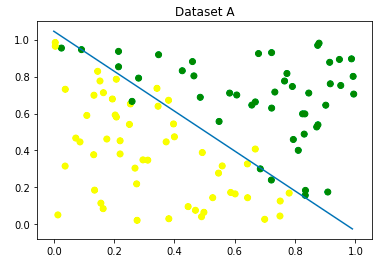

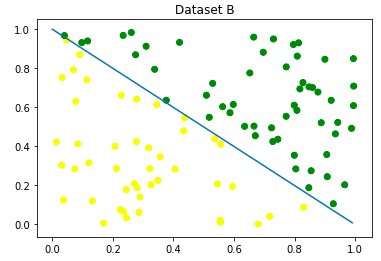

**Answer** <br>
From the above plots, it can be seen that data from dataset A is not linearly separable whereas dataset B is just barely linearly separable. 

Additionally, examining the norm with each iteration finds that while the norm for B does not become smaller than EPSILON = 1E-15 in a reasonable amount of time, it does become less than 0.001, demonstrating that the algorithm is working and the problem has to do with convergence.

Mathematically, the reason that dataset B does not converge using gradient ascent is that $\theta$ can be increased without affecting the correctness of the classifications due to the linear separability. Thus, there is no real cost to increasing $\theta$. Further, as $\theta$ increases each iteration by $c$, the likelihood increases marginally since $h_{\theta_{i+1}}= g(c \theta_i^T x)> g(\theta_i^T x) = h_{\theta_i}$ for positively classified examples. The reverse is true for negatively classified examples, which is captured by the likelihood function as an increase in probability. 

Alternatively, with datasets like A that are not linearly separable, the eventual cost to increasing $\theta$ coming from the degree of misclassification of certain examples increasing, outweights the increase in the likelihood function from correctly classifying examples by a greater margin.   

**Other thoughts** 
* Plotting the thetas, for dataset B, they keep rising or falling (not even jumping over the same values).  **This might indicate that they are scaling together and just getting larger...with a SVM, this wouldn't happen since it is normalized** 
* Plotting the norms, dataset B does get closer to the limit as time goes on. It just doesn't get low enough, but it still is decreasing over time, not jumping up and down or oscilating. 
* Plotting the values of the data, they both have relatively similar distributions for X and Y. It's weird that this happens. 
* Plotting scatter plots for dataset A and B with colors indicating labels shows that both are quite linearly separable. 

--- 

**(c)** [5 points] *For each of these possible modifications, state whether or not it would lead to the provided training algorithm converging on datasets such as B. Justify your answers.* <br>
1. Using a different constant learning rate. <br>
2. Decreasing the learning rate over time (e.g. scaling the initial learning rate by 1=t2,
where t is the number of gradient descent iterations thus far).<br>
3. Linear scaling of the input features.<br>
4. Adding a regularization term to the loss function.<br>
5. Adding zero-mean Gaussian noise to the training data or labels.<br>
<br>

**Answer** <br>

1. A different constant learning rate will not change the fact that there is no regularization for the size of $\theta$ and that increasing it will increase the likelihood to no end. 
2. This is unlikely to work for most ways to decrease the learning rate over time as $\theta$ can still be scaled by a large enough amount for the likelihood to not converge. Still, for a rapid enough decrease in learning rate, it is plausible that the rate of decrease in learning rate outweights the rate of increase in $\theta$. 
3. This won't change the fact that data in datasets like B are linearly separable and thus, that the likelihood function can be increased endlessly by scaling $\theta$
4. By definition, this will work as the core reason that datasets like B do not converge is the lack of a penalty for increasing $\theta$ endlessly. 
5. This could also work if it alters the data to the extent of it not being linearly separable, such that the data is more like dataset A. 

--- 

**(d)** [3 points] *Are support vector machines, vulnerable to datasets like B? Why or why not? Give an informal justification.*

**Answer** <br>

* Because of the $||W|| =1$ constraint, the parameters can't endlessly increase to increase the likelihood. Thus, the parameters that maximize the margin should converge within a reasonable amount of time. 
--- 

In [3]:
import stability
import numpy as np
import util
import matplotlib.pyplot as plt


In [48]:
stability.main()

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30372 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations


KeyboardInterrupt: 

In [4]:
Xa, Ya = util.load_csv('ds1_a.csv', add_intercept=True)
Xb, Yb = util.load_csv('ds1_b.csv', add_intercept=True)

Mean of col 2 for Xa 0.49226198257923853
Mean of col 3 for Xa 0.5297924176303037
Mean of Ya 0.46
Mean of col 2 for Xb 0.512780997849052
Mean of col 3 for Xb 0.502707348147922
Mean of Yb 0.55
shape of Xa  (100, 3)
shape of Xb  (100, 3)


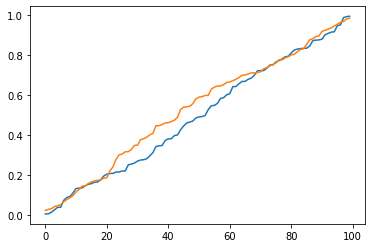

In [112]:
#exploring data distribution
print("Mean of col 2 for Xa", np.mean(Xa[:,1]))
print("Mean of col 3 for Xa", np.mean(Xa[:,2]))
print("Mean of Ya", np.mean(Ya))


print("Mean of col 2 for Xb", np.mean(Xb[:,1]))
print("Mean of col 3 for Xb", np.mean(Xb[:,2]))
print("Mean of Yb", np.mean(Yb))

print("shape of Xa ", Xa.shape)
print("shape of Xb ", Xb.shape)

Xa_sorted_1 = Xa[np.argsort(Xa[:,1])][:,1]
Xa_sorted_2 = Xa[np.argsort(Xa[:,2])][:,2]

Xb_sorted_1 = Xb[np.argsort(Xb[:,1])][:,1]
Xb_sorted_2 = Xb[np.argsort(Xb[:,2])][:,2]

plt.plot(Xa_sorted_1)
plt.plot(Xa_sorted_2)




In [145]:
#label colors for each point
colors = []
for c in range(100):
    colors.append('green') if Ya[c]==1 else colors.append('yellow')

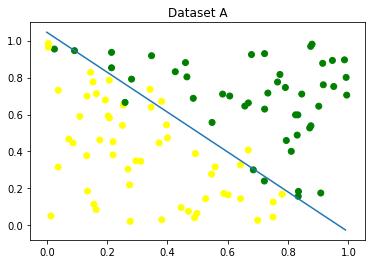

In [13]:
#Plotting a scatter of Xa data with labels (relatively linearly separable)
#label colors for each point
colors = []
for c in range(100):
    colors.append('green') if Ya[c]==1 else colors.append('yellow')

theta_0 = -20.8
theta_1 = 21.5
theta_2 = 19.9

xvals = np.arange(0,1,0.01)
yvals = (-1*theta_1*xvals - theta_0)/theta_2
plt.plot(xvals,yvals)
plt.scatter(Xa[:,1],Xa[:,2],c=colors)
plt.title("Dataset A")
plt.show() 


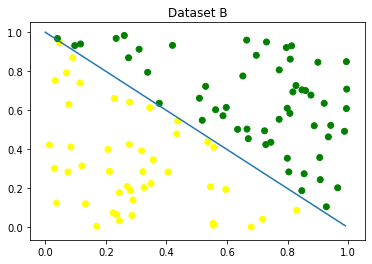

In [14]:
#label colors for each point
colors = []
for c in range(100):
    colors.append('green') if Yb[c]==1 else colors.append('yellow')

theta_0 = -58.6
theta_1 = 58.8
theta_2 = 58.6

xvals = np.arange(0,1,0.01)
yvals = (-1*theta_1*xvals - theta_0)/theta_2
plt.plot(xvals,yvals)
plt.scatter(Xb[:,1],Xb[:,2],c=colors)
plt.title("Dataset B")
plt.show() 


In [19]:
Xa_norms = np.array(modified_logistic_regression(Xa,Ya,store_norms=True))
Xb_norms = np.array(modified_logistic_regression(Xb,Yb,store_norms=True))

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30372 iterations
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310000 iterations
Finished 320000 iterations
Finished 330000 iterations
Finished 3

0.005132094178739921
8.460456489172588e-05

0.0018786315924827718
4.574731059980614e-13
Minimium norm for Xb 0.00014855036473806414


Text(0.5, 1.0, 'Norm for Xb vs. iteration')

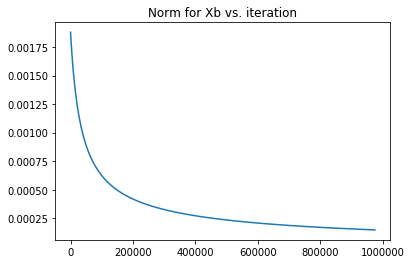

In [20]:
print(Xb_norms[5000])
print(Xa_norms[5000])
print()
print(Xb_norms[25000])
print(Xa_norms[25000])

print("Minimium norm for Xb", np.min(Xb_norms))


#beyond 25000 iterations, the norm decrease starts to decline...
# it might be that the lr is too high... it's weird though because the parameters don't keep oscilating
plt.plot(Xb_norms[25000:])
plt.title("Norm for Xb vs. iteration")

In [8]:
Xa_thetas = np.array(modified_logistic_regression(Xa,Ya,store_theta=True))
Xb_thetas = np.array(modified_logistic_regression(Xb,Yb,store_theta=True))

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Converged in 120001 iterations
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Converged in 200001 iterations


In [118]:
Xa_thetas

array([[  0.        ,   0.        ,   0.        ],
       [ -0.4       ,   0.69338939,   0.5253833 ],
       [ -1.33762562,   0.97575867,   0.65845492],
       ...,
       [-20.81437788,  21.45295159,  19.85198176],
       [-20.81437788,  21.45295159,  19.85198176],
       [-20.81437788,  21.45295159,  19.85198176]])

In [9]:
Xb_thetas


array([[  0.        ,   0.        ,   0.        ],
       [  0.5       ,   1.2403198 ,   1.03110449],
       [ -2.28812189,   0.63417382,   0.28157131],
       ...,
       [-58.63922089,  58.81632545,  58.612964  ],
       [-58.63922089,  58.81632545,  58.612964  ],
       [-58.63922089,  58.81632545,  58.612964  ]])

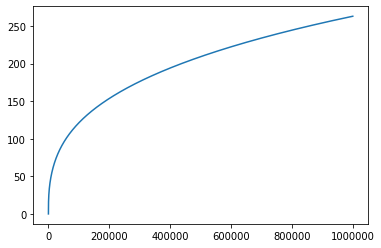

In [78]:
plt.plot(Xb_thetas[:,2])

In [139]:
#test out lr's
modified_logistic_regression(Xb,Yb)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Converged in 200001 iterations


In [18]:
import util
import numpy as np
import matplotlib.pyplot as plt


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    count, _ = X.shape

    probs = 1. / (1 + np.exp(-X.dot(theta)))
    grad = (Y - probs).dot(X)

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    theta = np.zeros(X.shape[1])
    learning_rate = 0.1

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta + learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        EPSILON = 1e-15
        if np.linalg.norm(prev_theta - theta) < EPSILON:
            print('Converged in %d iterations' % i)
            break
    return

def modified_logistic_regression(X, Y, store_theta=False,store_norms=False):
    """Train a logistic regression model."""
    theta = np.zeros(X.shape[1])
    learning_rate = 0.1
    i = 0
    thetas = []
    norms = []
    while True:
        thetas.append(theta)
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta + learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            #learning_rate = learning_rate/4
        EPSILON = 1e-15
        if np.linalg.norm(prev_theta - theta) < EPSILON:
            print('Converged in %d iterations' % i)
            break
        norms.append(np.linalg.norm(prev_theta-theta))
        
        
        if i > 1000000:
            break
    if store_theta: 
        return thetas
    elif store_norms:
        return norms
    else: return 